#Librerias

In [1]:
# Datos
import numpy as np
import pandas as pd

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from random import random

# Preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from scipy import stats

# Evaluacion
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

#Tamño default de los plots
plt.rcParams["figure.figsize"] = [10,6]

In [ ]:
df_calendar=pd.read_csv("/content/drive/MyDrive/CAPSTONE_Stefa/data_dsmarket/daily_calendar_with_events.csv")

In [ ]:
df_prices=pd.read_csv("/content/drive/MyDrive/CAPSTONE_Stefa/data_dsmarket/item_prices.csv")

In [ ]:
df_sales=pd.read_csv("/content/drive/MyDrive/CAPSTONE_Stefa/data_dsmarket/item_sales.csv")

#Exploracion de los datos

##df_calendar

In [ ]:
df_calendar.head(2)

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN


In [ ]:
df_calendar.describe

<bound method NDFrame.describe of             date    weekday  weekday_int       d event
0     2011-01-29   Saturday            1     d_1   NaN
1     2011-01-30     Sunday            2     d_2   NaN
2     2011-01-31     Monday            3     d_3   NaN
3     2011-02-01    Tuesday            4     d_4   NaN
4     2011-02-02  Wednesday            5     d_5   NaN
...          ...        ...          ...     ...   ...
1908  2016-04-20  Wednesday            5  d_1909   NaN
1909  2016-04-21   Thursday            6  d_1910   NaN
1910  2016-04-22     Friday            7  d_1911   NaN
1911  2016-04-23   Saturday            1  d_1912   NaN
1912  2016-04-24     Sunday            2  d_1913   NaN

[1913 rows x 5 columns]>

In [ ]:
df_calendar.info() #ojo fecha esta en object--> pasar a datetime para manipulacion.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1913 non-null   object
 1   weekday      1913 non-null   object
 2   weekday_int  1913 non-null   int64 
 3   d            1913 non-null   object
 4   event        26 non-null     object
dtypes: int64(1), object(4)
memory usage: 74.9+ KB


df_calendar.columns

In [ ]:
eventos_tipos = np.where(df_calendar['event'].notnull()) #aca obtenemos el index de los que NO son nulos. Asi podremos revisar si podemos completar
                                                        #con datos de festivos del año que puedan aportar info.

In [ ]:
eventos_tipos

(array([   8,  184,  299,  337,  372,  435,  538,  663,  703,  736,  792,
         892, 1034, 1068, 1100, 1177, 1247, 1398, 1433, 1464, 1527, 1601,
        1762, 1798, 1835, 1884]),)

In [ ]:
df_calendar.iloc[eventos_tipos]

,date,weekday,weekday_int,d,event
8,2011-02-06,Sunday,2,d_9,SuperBowl
184,2011-08-01,Monday,3,d_185,Ramadan starts
299,2011-11-24,Thursday,6,d_300,Thanksgiving
337,2012-01-01,Sunday,2,d_338,NewYear
372,2012-02-05,Sunday,2,d_373,SuperBowl
435,2012-04-08,Sunday,2,d_436,Easter
538,2012-07-20,Friday,7,d_539,Ramadan starts
663,2012-11-22,Thursday,6,d_664,Thanksgiving
703,2013-01-01,Tuesday,4,d_704,NewYear
736,2013-02-03,Sunday,2,d_737,SuperBowl


In [ ]:
df_calendar

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NaN
1,2011-01-30,Sunday,2,d_2,NaN
2,2011-01-31,Monday,3,d_3,NaN
3,2011-02-01,Tuesday,4,d_4,NaN
4,2011-02-02,Wednesday,5,d_5,NaN
...,...,...,...,...,...
1908,2016-04-20,Wednesday,5,d_1909,NaN
1909,2016-04-21,Thursday,6,d_1910,NaN
1910,2016-04-22,Friday,7,d_1911,NaN
1911,2016-04-23,Saturday,1,d_1912,NaN


In [ ]:
df_calendar['date'] = pd.to_datetime(df_calendar['date'])

In [ ]:
df_calendar['date'].dtype

dtype('<M8[ns]')

In [ ]:
min_date_ = df_calendar['date'].min()

min_date_

Timestamp('2011-01-29 00:00:00')

In [ ]:
max_date_ = df_calendar['date'].max()

max_date_

Timestamp('2016-04-24 00:00:00')

In [ ]:
prueba_ = df_calendar.loc[df_calendar['date'] == '2016-04-24']
prueba_

#ok, localizamos correcto la fecha

,date,weekday,weekday_int,d,event
1912,2016-04-24,Sunday,2,d_1913,NaN


In [ ]:
#buscamos si la fecha de navidad del 2016 esta completa
nav_2016 = df_calendar.loc[df_calendar['date'] == '2016-12-25']
nav_2016

#no tiene datos: hacemos un df de navidades y luego un .append para agregar este festivo a todos los años

,date,weekday,weekday_int,d,event


In [ ]:
dict_navidad = {'date' : ['2016-12-25 00:00:00', '2015-12-25 00:00:00', '2014-12-25 00:00:00', ' 2013-12-25 00:00:00', '2012-12-25 00:00:00', '2011-12-25 00:00:00'],
                   'weekday' : ['Sunday', 'Friday', 'Thursday' , 'Wednesday', 'Tuesday', 'Monday'],
                   'weekday_int': [ 2, 7, 6, 5, 4, 3 ],
                   'd' : ['d_2186', 'd_1820', 'd_1455', 'd_1090' , 'd_725', 'd_360'],
                   'event' : ['Christmas', 'Christmas' ,'Christmas', 'Christmas', 'Christmas', 'Christmas']
              }

In [ ]:
df_navidad_ = pd.DataFrame(dict_navidad)

In [ ]:
df_calendar = df_calendar.append(df_navidad_, ignore_index = True)

In [ ]:
eventos_tipos_ = np.where(df_calendar['event'].notnull())

In [ ]:
df_calendar.loc[eventos_tipos_]

,date,weekday,weekday_int,d,event
8,2011-02-06 00:00:00,Sunday,2,d_9,SuperBowl
184,2011-08-01 00:00:00,Monday,3,d_185,Ramadan starts
299,2011-11-24 00:00:00,Thursday,6,d_300,Thanksgiving
337,2012-01-01 00:00:00,Sunday,2,d_338,NewYear
372,2012-02-05 00:00:00,Sunday,2,d_373,SuperBowl
435,2012-04-08 00:00:00,Sunday,2,d_436,Easter
538,2012-07-20 00:00:00,Friday,7,d_539,Ramadan starts
663,2012-11-22 00:00:00,Thursday,6,d_664,Thanksgiving
703,2013-01-01 00:00:00,Tuesday,4,d_704,NewYear
736,2013-02-03 00:00:00,Sunday,2,d_737,SuperBowl


In [ ]:
#verificamos que completo navidad de los años 2016-2015-2014-2013-2012-2011

In [ ]:
nav_2015_ = df_calendar.loc[df_calendar['date'] == '2015-12-25 00:00:00']
nav_2015_

,date,weekday,weekday_int,d,event
1914,2015-12-25 00:00:00,Friday,7,d_1820,Christmas


In [ ]:
df_calendar['event'].isnull().sum()

1887

In [ ]:
df_calendar['event'].fillna('NRD', inplace = True) #NRD = 'no relevant date'

In [ ]:
#comprobamos df_calendar sin nulos- OK

In [ ]:
print('Los elementos nulos por columna son: ')

df_calendar.isnull().sum()


Los elementos nulos por columna son: 


date           0
weekday        0
weekday_int    0
d              0
event          0
dtype: int64

In [ ]:
df_calendar.shape

(1919, 5)

In [ ]:
#Exportamos a .xls y .csv para tratamiento de datos en PowerBI

In [ ]:
df_calendar.to_excel('df_calendar_clean.xlsx', index = False, encoding = 'utf-8')

In [ ]:
df_calendar.to_csv('df_calendar_clean_csv', index = False, encoding = 'utf-8')

#df_prices

In [ ]:
df_prices.shape

(6965706, 5)

In [ ]:
df_prices.head(3)

,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328.0,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329.0,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330.0,10.9858


In [ ]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965706 entries, 0 to 6965705
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category    object 
 2   store_code  object 
 3   yearweek    float64
 4   sell_price  float64
dtypes: float64(2), object(3)
memory usage: 265.7+ MB


In [ ]:
df_prices.describe

<bound method NDFrame.describe of                       item     category store_code  yearweek  sell_price
0         ACCESORIES_1_001   ACCESORIES      NYC_1  201328.0     12.7414
1         ACCESORIES_1_001   ACCESORIES      NYC_1  201329.0     12.7414
2         ACCESORIES_1_001   ACCESORIES      NYC_1  201330.0     10.9858
3         ACCESORIES_1_001   ACCESORIES      NYC_1  201331.0     10.9858
4         ACCESORIES_1_001   ACCESORIES      NYC_1  201332.0     10.9858
...                    ...          ...        ...       ...         ...
6965701  SUPERMARKET_3_827  SUPERMARKET      PHI_3       NaN      1.2000
6965702  SUPERMARKET_3_827  SUPERMARKET      PHI_3       NaN      1.2000
6965703  SUPERMARKET_3_827  SUPERMARKET      PHI_3       NaN      1.2000
6965704  SUPERMARKET_3_827  SUPERMARKET      PHI_3       NaN      1.2000
6965705  SUPERMARKET_3_827  SUPERMARKET      PHI_3       NaN      1.2000

[6965706 rows x 5 columns]>

In [ ]:
df_prices['item'].value_counts() #tenemos un total de 3049 items diferentes en 3 categorias
                                 #dentro de las 3 regiones que nos interesan (BOS - NYC - PHI)


SUPERMARKET_3_587      2870
HOME_&_GARDEN_1_177    2870
HOME_&_GARDEN_2_283    2870
ACCESORIES_1_337       2870
SUPERMARKET_1_032      2870
                       ... 
HOME_&_GARDEN_1_308     652
HOME_&_GARDEN_1_159     633
HOME_&_GARDEN_1_242     610
SUPERMARKET_3_296       602
SUPERMARKET_2_379       543
Name: item, Length: 3049, dtype: int64

In [ ]:
df_prices['store_code'].value_counts()

BOS_2    713960
BOS_1    712527
NYC_1    711073
PHI_3    708747
NYC_3    706585
BOS_3    703682
NYC_4    691375
PHI_2    690546
PHI_1    678209
NYC_2    649002
Name: store_code, dtype: int64

In [ ]:
df_prices['category'].nunique()

3

In [ ]:
df_prices['category'].value_counts() #tenemos 3 categorias : Supermarket / Home_garden / Accesories

SUPERMARKET      3239821
HOME_&_GARDEN    2418627
ACCESORIES       1307258
Name: category, dtype: int64

In [ ]:
df_prices.isnull().sum()

item               0
category           0
store_code         0
yearweek      243920
sell_price         0
dtype: int64

##Tratamiento por columna en orden

In [ ]:
#1) item - sin cambios necesarios

In [ ]:
# 2)
#completamos nulos de 'yearweek' con funcion interpolate.
#primero para ello, hay que ordenar el df segun esa columna
#luego se resetea index

In [ ]:
df_prices.sort_values(by='yearweek', inplace=True)

In [ ]:
# Usamos linear interpolation para completar NaNs secuenciales. Esta funcion permite completar datos que respoden a una secuencia evolutiva. Se debe ordenar
#la columna a tratar para que el codigo comprenda como es la secuencia de datos.

df_prices['yearweek'].interpolate(method='linear', inplace=True)


In [ ]:
print(df_prices)

                        item       category store_code  yearweek  sell_price
5539160    SUPERMARKET_3_702    SUPERMARKET      PHI_1  201105.0      3.9360
6613947  HOME_&_GARDEN_2_445  HOME_&_GARDEN      PHI_3  201105.0      8.1000
261069   HOME_&_GARDEN_2_041  HOME_&_GARDEN      NYC_1  201105.0      6.5875
1516539  HOME_&_GARDEN_1_117  HOME_&_GARDEN      NYC_3  201105.0     11.2125
563249     SUPERMARKET_3_188    SUPERMARKET      NYC_1  201105.0      2.3760
...                      ...            ...        ...       ...         ...
6965701    SUPERMARKET_3_827    SUPERMARKET      PHI_3  201617.0      1.2000
6965702    SUPERMARKET_3_827    SUPERMARKET      PHI_3  201617.0      1.2000
6965703    SUPERMARKET_3_827    SUPERMARKET      PHI_3  201617.0      1.2000
6965704    SUPERMARKET_3_827    SUPERMARKET      PHI_3  201617.0      1.2000
6965705    SUPERMARKET_3_827    SUPERMARKET      PHI_3  201617.0      1.2000

[6965706 rows x 5 columns]


In [ ]:
#verificamos nulos

In [ ]:
print(f"Los valores nulos fueron completados, columna limpia sin NaNs: {df_prices['yearweek'].isnull().sum()}")

Los valores nulos fueron completados, columna limpia sin NaNs: 0


In [ ]:
df_prices.reset_index(drop=True, inplace=True) #resetaemos index

In [ ]:
min_yearweek = df_prices['yearweek'].min()
max_yearweek = df_prices['yearweek'].max()

In [ ]:
print(f"Min date is {min_yearweek}\nMax date is {max_yearweek}")

Min date is 201105.0
Max date is 201617.0


In [ ]:
df_prices['yearweek'].astype(int) #cambiamos yearweek de float a int.

0          201105
1          201105
2          201105
3          201105
4          201105
            ...  
6965701    201617
6965702    201617
6965703    201617
6965704    201617
6965705    201617
Name: yearweek, Length: 6965706, dtype: int64

array([[<Axes: title={'center': 'yearweek'}>]], dtype=object)

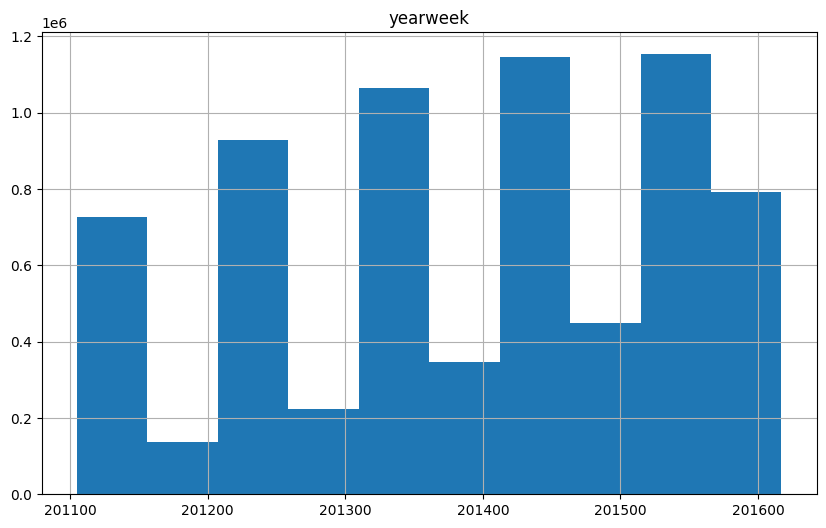

In [ ]:
df_prices.hist('yearweek')

In [ ]:
df_prices.isnull().sum() #no hay mas NaNs a tratar en cada columna

item          0
category      0
store_code    0
yearweek      0
sell_price    0
dtype: int64

In [ ]:
#4)Columna : sell_price

In [ ]:
df_prices['sell_price']

0           3.9360
1           8.1000
2           6.5875
3          11.2125
4           2.3760
            ...   
6965701     1.2000
6965702     1.2000
6965703     1.2000
6965704     1.2000
6965705     1.2000
Name: sell_price, Length: 6965706, dtype: float64

In [ ]:
max_price = df_prices['sell_price'].max()

print(f'El precio maximo es {max_price}') #outlier

El precio maximo es 134.14999999999998


In [ ]:
min_price = df_prices['sell_price'].min()

print(f'El precio minimo es {min_price}')

El precio minimo es 0.012


In [ ]:
mean_price = df_prices['sell_price'].mean()

print(f'El precio promedio es {mean_price}')

El precio promedio es 5.518272629522402


array([[<Axes: title={'center': 'sell_price'}>]], dtype=object)

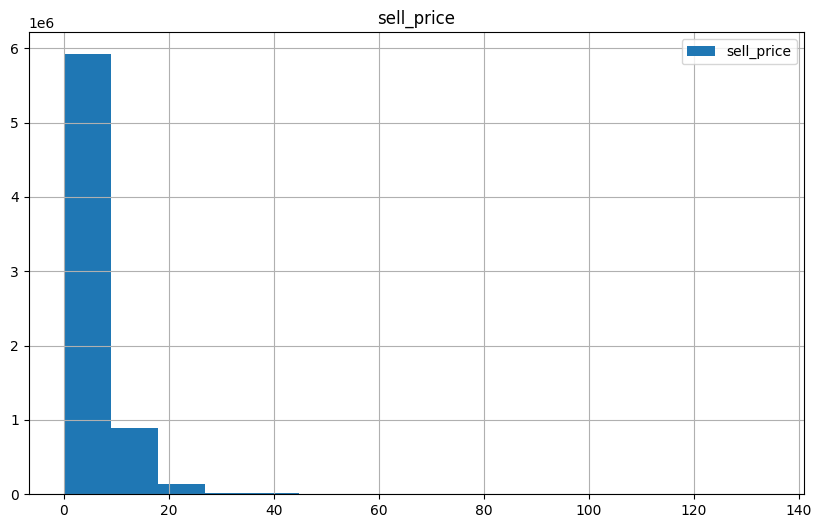

In [ ]:
df_prices.hist('sell_price', legend = True, bins = 15)

In [ ]:
df_prices['sell_price'].round(3) #redondeamos precios a 3 decimales

0           3.936
1           8.100
2           6.588
3          11.212
4           2.376
            ...  
6965701     1.200
6965702     1.200
6965703     1.200
6965704     1.200
6965705     1.200
Name: sell_price, Length: 6965706, dtype: float64

In [ ]:
#exploramos valores outliers <= a 1 para ver si tiene sentido. OK!

In [ ]:
lower_prices = df_prices.loc[df_prices['sell_price']<=1]
lower_prices



,item,category,store_code,yearweek,sell_price
12,ACCESORIES_1_404,ACCESORIES,BOS_1,201105.0,0.6118
79,HOME_&_GARDEN_2_371,HOME_&_GARDEN,NYC_1,201105.0,0.9750
106,SUPERMARKET_3_711,SUPERMARKET,NYC_1,201105.0,0.2400
123,ACCESORIES_1_103,ACCESORIES,PHI_3,201105.0,0.9310
133,SUPERMARKET_2_128,SUPERMARKET,BOS_2,201105.0,0.6960
...,...,...,...,...,...
6965613,SUPERMARKET_3_816,SUPERMARKET,PHI_3,201617.0,0.3000
6965614,SUPERMARKET_3_816,SUPERMARKET,PHI_3,201617.0,0.3000
6965615,SUPERMARKET_3_816,SUPERMARKET,PHI_3,201617.0,0.3000
6965616,SUPERMARKET_3_816,SUPERMARKET,PHI_3,201617.0,0.3000


In [ ]:
total_rows = 6965706
low_price_rows = 200792

proportion_low_prices = ((low_price_rows / total_rows) * 100)

print(f'La proporcion de productos menor a $1 es de : {proportion_low_prices} %')

La proporcion de productos menor a $1 es de : 2.8825793106972935 %


In [ ]:
df_prices.shape

(6965706, 5)

#df_sales


In [ ]:
df_sales.shape

(30490, 1920)

In [ ]:
df_sales.columns.tolist #sin los parentesis de funcion, asi nos muestra un array de cols 
                        #ya que sabemos que son demasiadas cols

<bound method IndexOpsMixin.tolist of Index(['id', 'item', 'category', 'department', 'store', 'store_code', 'region',
       'd_1', 'd_2', 'd_3',
       ...
       'd_1904', 'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910',
       'd_1911', 'd_1912', 'd_1913'],
      dtype='object', length=1920)>

In [ ]:
df_sales.head(3)

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1


In [ ]:
#1) Columna : id

In [ ]:
df_sales['id'].value_counts() #coincidente con el nro de rows.

ACCESORIES_1_001_NYC_1       1
SUPERMARKET_2_202_BOS_3      1
SUPERMARKET_2_214_BOS_3      1
SUPERMARKET_2_213_BOS_3      1
SUPERMARKET_2_212_BOS_3      1
                            ..
HOME_&_GARDEN_1_457_NYC_4    1
HOME_&_GARDEN_1_456_NYC_4    1
HOME_&_GARDEN_1_455_NYC_4    1
HOME_&_GARDEN_1_454_NYC_4    1
SUPERMARKET_3_827_PHI_3      1
Name: id, Length: 30490, dtype: int64

In [ ]:
#2) Columna : item

In [ ]:
df_sales['item'].value_counts()

ACCESORIES_1_001       10
SUPERMARKET_2_210      10
SUPERMARKET_2_201      10
SUPERMARKET_2_202      10
SUPERMARKET_2_203      10
                       ..
HOME_&_GARDEN_1_464    10
HOME_&_GARDEN_1_465    10
HOME_&_GARDEN_1_466    10
HOME_&_GARDEN_1_467    10
SUPERMARKET_3_827      10
Name: item, Length: 3049, dtype: int64

In [ ]:
print(f'En variable item tenemos : 3049 items diferentes')

En variable item tenemos : 3049 items diferentes


In [ ]:
#3) Columna : category

In [ ]:
df_sales['category'].value_counts()

SUPERMARKET      14370
HOME_&_GARDEN    10470
ACCESORIES        5650
Name: category, dtype: int64

In [ ]:
#4) Columna : department

In [ ]:
df_sales['department'].value_counts()

SUPERMARKET_3      8230
HOME_&_GARDEN_1    5320
HOME_&_GARDEN_2    5150
ACCESORIES_1       4160
SUPERMARKET_2      3980
SUPERMARKET_1      2160
ACCESORIES_2       1490
Name: department, dtype: int64

In [ ]:
#5) Columna : store

In [ ]:
df_sales['store'].value_counts()

Greenwich_Village    3049
Harlem               3049
Tribeca              3049
Brooklyn             3049
South_End            3049
Roxbury              3049
Back_Bay             3049
Midtown_Village      3049
Yorktown             3049
Queen_Village        3049
Name: store, dtype: int64

In [ ]:
df_sales['store'].isnull().sum()

0

In [ ]:
#no hay nulos ni erratas de strings

In [ ]:
#5) Columna : store_code

In [ ]:
df_sales['store_code'].isnull().sum()

0

In [ ]:
df_sales['store_code'].value_counts()

NYC_1    3049
NYC_2    3049
NYC_3    3049
NYC_4    3049
BOS_1    3049
BOS_2    3049
BOS_3    3049
PHI_1    3049
PHI_2    3049
PHI_3    3049
Name: store_code, dtype: int64

In [ ]:
# no hay errores de string

In [ ]:
#6) Columna : region

In [ ]:
df_sales['region'].isnull().sum()

0

In [ ]:
df_sales['region'].value_counts()

New York        12196
Boston           9147
Philadelphia     9147
Name: region, dtype: int64

In [ ]:
df_sales.head(10)

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4
5,ACCESORIES_1_006_NYC_1,ACCESORIES_1_006,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,1,0,1,0,0,0,2,0,0
6,ACCESORIES_1_007_NYC_1,ACCESORIES_1_007,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,1,0,1,0,0,1,1
7,ACCESORIES_1_008_NYC_1,ACCESORIES_1_008,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,12,15,0,...,0,0,1,37,3,4,6,3,2,1
8,ACCESORIES_1_009_NYC_1,ACCESORIES_1_009,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,2,0,7,...,0,0,1,1,6,0,0,0,0,0
9,ACCESORIES_1_010_NYC_1,ACCESORIES_1_010,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,1,...,1,0,0,0,0,0,0,2,0,2


In [ ]:
# Columna : 7 : tenemos un total de  1913 cols : todas days por separado: hacer group by por semana

# df_sales

In [ ]:
df_sales_ = df_sales.copy()

In [ ]:
#me quedo solo con las solumnas de dias : df_selected_columns
#separo de a 7 columnas = 7 dias . esto genera pequeños diferentes dfs

In [ ]:
df_selected_columns = df_sales.filter(like='d_', axis=1)

In [ ]:
df_selected_columns.head(1)

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1


In [ ]:
#probamos agrupacion y suma total de cada columna por dia

In [ ]:
columns_per_group = 7

In [ ]:
grouped_dfs = []

In [ ]:
grouped_dfs

[]

In [ ]:
for i in range(0, len(df_selected_columns.columns), columns_per_group):
    # Extract the columns for the current group
    group = df_selected_columns.iloc[:, i:i + columns_per_group]

In [ ]:
# Sum the values along the columns (axis=1) for each row in the group
grouped_sum = group.sum(axis=1)

In [ ]:
# Append the grouped sum to the list
grouped_dfs.append(grouped_sum)

In [ ]:
# Concatenate the grouped sums horizontally to form the final DataFrame
result_df = pd.concat(grouped_dfs, axis=1)

In [ ]:
# Print the result DataFrame
print(result_df)

       0
0      2
1      0
2      2
3      9
4      6
...   ..
30485  1
30486  1
30487  1
30488  4
30489  0

[30490 rows x 1 columns]


In [ ]:
df_sales.shape

(30490, 1920)

In [ ]:
#filtramos solo las columnas que refieren a dias

In [ ]:
df_selected_columns.shape

(30490, 1913)

In [ ]:
#invertimos columnas a rows

In [ ]:
df_transposed = df_selected_columns.melt()

In [ ]:
df_transposed.head(3) #ojo, hay que renombrar las columnas : semana 1 (after resample) y 
                        #
value : qty (quantity
                        #luego hacer un merge con el original df_sales

,variable,value
0,d_1,0
1,d_1,0
2,d_1,0


In [ ]:
df_transposed.shape

(58327370, 2)

In [ ]:
df_calendar.shape

(1919, 5)

In [ ]:
df_prices.shape

(6965706, 5)

In [ ]:
df_prices.head()

,item,category,store_code,yearweek,sell_price
0,SUPERMARKET_3_702,SUPERMARKET,PHI_1,201105.0,3.9360
1,HOME_&_GARDEN_2_445,HOME_&_GARDEN,PHI_3,201105.0,8.1000
2,HOME_&_GARDEN_2_041,HOME_&_GARDEN,NYC_1,201105.0,6.5875
3,HOME_&_GARDEN_1_117,HOME_&_GARDEN,NYC_3,201105.0,11.2125
4,SUPERMARKET_3_188,SUPERMARKET,NYC_1,201105.0,2.3760


In [ ]:
df_calendar.head(2)

,date,weekday,weekday_int,d,event
0,2011-01-29 00:00:00,Saturday,1,d_1,NRD
1,2011-01-30 00:00:00,Sunday,2,d_2,NRD


In [ ]:
df_calendar.sort_values(by= 'date', inplace = True)

In [ ]:
df_calendar['date'].dtype

dtype('<M8[ns]')

In [ ]:
df_calendar.head(2)

,date,weekday,weekday_int,d,event
0,2011-01-29,Saturday,1,d_1,NRD
1,2011-01-30,Sunday,2,d_2,NRD


In [ ]:
df_calendar_transposed = pd.concat ([df_calendar,df_transposed], axis= 1)

In [ ]:
df_calendar_transposed.head(20)

,date,weekday,weekday_int,d,event,variable,value
0,2011-01-29,Saturday,1.0,d_1,NRD,d_1,0
1,2011-01-30,Sunday,2.0,d_2,NRD,d_1,0
2,2011-01-31,Monday,3.0,d_3,NRD,d_1,0
3,2011-02-01,Tuesday,4.0,d_4,NRD,d_1,0
4,2011-02-02,Wednesday,5.0,d_5,NRD,d_1,0
5,2011-02-03,Thursday,6.0,d_6,NRD,d_1,0
6,2011-02-04,Friday,7.0,d_7,NRD,d_1,0
7,2011-02-05,Saturday,1.0,d_8,NRD,d_1,12
8,2011-02-06,Sunday,2.0,d_9,SuperBowl,d_1,2
9,2011-02-07,Monday,3.0,d_10,NRD,d_1,0


In [ ]:
df_calendar_transposed.sort_index('date')

In [ ]:
df_calendar_transposed.resample("W")['date']

In [ ]:
df_sales.head()

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,2,1,1,0,1,1,2,2,2,4
